In [70]:
library(tidyverse)
library(magrittr)
library(caret)
library(zeallot)
source("R/hte_caret.R")

In [71]:
model_specs = list(
gbm = expand.grid(n.trees = seq(1,501,20), 
                  interaction.depth=3, 
                  shrinkage = 0.1, 
                  n.minobsinnode=3),
glmnet = expand.grid(alpha=c(0,0.5,1),
                     lambda=exp(seq(-5,2,0.2)))
)

In [3]:
make_matrix = function(x) stats::model.matrix(~.-1, x)

In [96]:
n = 2000
x = data.frame("covariate_1" = rnorm(n), "covariate_2"= rnorm(n)) %>% make_matrix
logit_p = (x %*% c(1,1))
p = exp(logit_p)/(1+exp(logit_p))
# p = 0.5
w = rbinom(n,1,p)==1
tau = (x %*% c(1,1))^2
y = (x %*% c(1,-3) + tau/2*(2*w-1) + rnorm(n))[,1]
ybin = factor(ifelse(y>0, "treated", "control"))
weights = rnorm(n,1,0)
i_tr = 1:floor(n*0.5)

In [ ]:
r_model = R_learner_cv(x[i_tr,], w[i_tr], y[i_tr], 
                      model_specs, model_specs, model_specs, k_folds_cv=5) 
tauhat_r_te = predict(r_model, newdata=x[-i_tr,])
tauhat_r_tr = predict(r_model, newdata=x[i_tr,])

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regression

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        9.3593             nan     0.1000    0.9192
     2        8.5259             nan     0.1000    0.8236
     3        7.7799             nan     0.1000    0.7127
     4        7.1816             nan     0.1000    0.5155
     5        6.6551             nan     0.1000    0.4585
     6        6.1581             nan     0.1000    0.3931
     7        5.7106             nan     0.1000    0.3307
     8        5.3233             nan     0.1000    0.3516
     9        5.0041             nan     0.1000    0.2375
    10        4.6893             nan     0.1000    0.2271
    20        2.8288             nan     0.1000    0.0693
    40        2.0079             nan     0.1000   -0.0203
    60        1.8050             nan     0.1000   -0.0083
    80        1.7179             nan     0.1000   -0.0079
   100        1.6407             nan     0.1000   -0.0065
   120        1.5600             nan     0.1000   -0.0167
   140        

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regressionWarning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regression

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        9.5229             nan     0.1000    0.9597
     2        8.7179             nan     0.1000    0.7562
     3        7.9506             nan     0.1000    0.6116
     4        7.2912             nan     0.1000    0.6149
     5        6.7077             nan     0.1000    0.5225
     6        6.1404             nan     0.1000    0.5625
     7        5.7487             nan     0.1000    0.3849
     8        5.3757             nan     0.1000    0.3528
     9        5.0202             nan     0.1000    0.3549
    10        4.7038             nan     0.1000    0.2736
    20        2.9054             nan     0.1000    0.0429
    40        2.0279             nan     0.1000    0.0024
    60        1.8163             nan     0.1000    0.0035
    80        1.7450             nan     0.1000   -0.0090
   100        1.6727             nan     0.1000   -0.0200
   120        1.5976             nan     0.1000   -0.0255
   140        

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regressionWarning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regression

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        9.1848             nan     0.1000    0.8650
     2        8.3422             nan     0.1000    0.6964
     3        7.6734             nan     0.1000    0.5497
     4        7.0064             nan     0.1000    0.6290
     5        6.4241             nan     0.1000    0.5242
     6        5.9193             nan     0.1000    0.4427
     7        5.4932             nan     0.1000    0.4258
     8        5.1496             nan     0.1000    0.3285
     9        4.7869             nan     0.1000    0.3141
    10        4.4857             nan     0.1000    0.2453
    20        2.7967             nan     0.1000    0.0262
    40        2.0903             nan     0.1000   -0.0360
    60        1.9223             nan     0.1000   -0.0201
    80        1.8449             nan     0.1000   -0.0182
   100        1.7442             nan     0.1000   -0.0079
   120        1.6877             nan     0.1000   -0.0145
   140        

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regressionWarning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regression

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        9.4612             nan     0.1000    1.0907
     2        8.5815             nan     0.1000    0.7795
     3        7.8007             nan     0.1000    0.8060
     4        7.0950             nan     0.1000    0.6787
     5        6.4352             nan     0.1000    0.6083
     6        5.8999             nan     0.1000    0.4677
     7        5.4509             nan     0.1000    0.3886
     8        5.0418             nan     0.1000    0.3943
     9        4.6315             nan     0.1000    0.2805
    10        4.3359             nan     0.1000    0.2795
    20        2.4475             nan     0.1000    0.0458
    40        1.6028             nan     0.1000   -0.0026
    60        1.4388             nan     0.1000   -0.0559
    80        1.3351             nan     0.1000   -0.0072
   100        1.2626             nan     0.1000   -0.0054
   120        1.1985             nan     0.1000   -0.0045
   140        

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regressionWarning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regression

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        9.2134             nan     0.1000    0.9203
     2        8.3535             nan     0.1000    0.8930
     3        7.5871             nan     0.1000    0.6582
     4        6.9724             nan     0.1000    0.6002
     5        6.4207             nan     0.1000    0.4312
     6        5.8340             nan     0.1000    0.4180
     7        5.4369             nan     0.1000    0.3378
     8        5.0479             nan     0.1000    0.3529
     9        4.7241             nan     0.1000    0.2944
    10        4.4756             nan     0.1000    0.1271
    20        2.6231             nan     0.1000    0.1081
    40        1.7671             nan     0.1000   -0.0051
    60        1.6142             nan     0.1000   -0.0080
    80        1.5059             nan     0.1000   -0.0126
   100        1.4551             nan     0.1000   -0.0047
   120        1.4035             nan     0.1000   -0.0086
   140        

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regressionWarning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.

In [ ]:
qplot(tau[-i_tr,], tauhat_r_te) + geom_abline(slope=1)
qplot(tau[i_tr,], tauhat_r_tr) + geom_abline(slope=1)

In [ ]:
pp = R_learners_pred_test(i_tr, x, w, y, model_specs, model_specs, model_specs)

In [ ]:
tmses = pp %>% 
    group_by(model) %>%
    arrange(index) %>%
    summarize(tmse = sum((est_effect - tau[-i_tr])^2))

In [ ]:
best_model = tmses %>% filter(tmse == min(tmse)) %>% pull(model) %>% last()
tauhat = pp %>% filter(model==best_model) %>% pull(est_effect)
qplot(tau[-i_tr], tauhat) + geom_abline(slope=1)

In [ ]:
best_model

In [ ]:
muhat_val = cross_validated_cross_estimation(x[-i_tr,], y[-i_tr], model_specs) 
phat_val = cross_validated_cross_estimation(x[-i_tr,], w[-i_tr], model_specs)

In [ ]:
a = y[-i_tr] - muhat_val
b = w[-i_tr] - phat_val
tmses_hat = pp %>% 
    group_by(model) %>%
    arrange(index) %>%
    summarize(tmse = sum((a-b*est_effect)^2))

In [ ]:
best_model_hat = tmses_hat %>% filter(tmse == min(tmse)) %>% pull(model) %>% first()
tauhat = pp %>% filter(model==best_model_hat) %>% pull(est_effect)
qplot(tau[-i_tr], tauhat) + geom_abline(slope=1)

In [ ]:
best_model_hat

In [ ]:
inner_join(tmses, tmses_hat, by="model") %>% 
    rename(truth=tmse.x, estimate=tmse.y) %>%
    separate(model, c("method", "params"), sep="@") %$%
qplot(truth, estimate, color=method) 

----

In [68]:
tau_hat_S = S_learners_pred_test(i_tr, x, w, y, model_specs)

ERROR: Error in eval(expr, envir, enclos): could not find function "S_learners_pred_test"


In [69]:
tmses = tau_hat_S %>% 
    group_by(model) %>%
    arrange(index) %>%
    summarize(tmse = sum((est_effect - tau[-i_tr])^2))

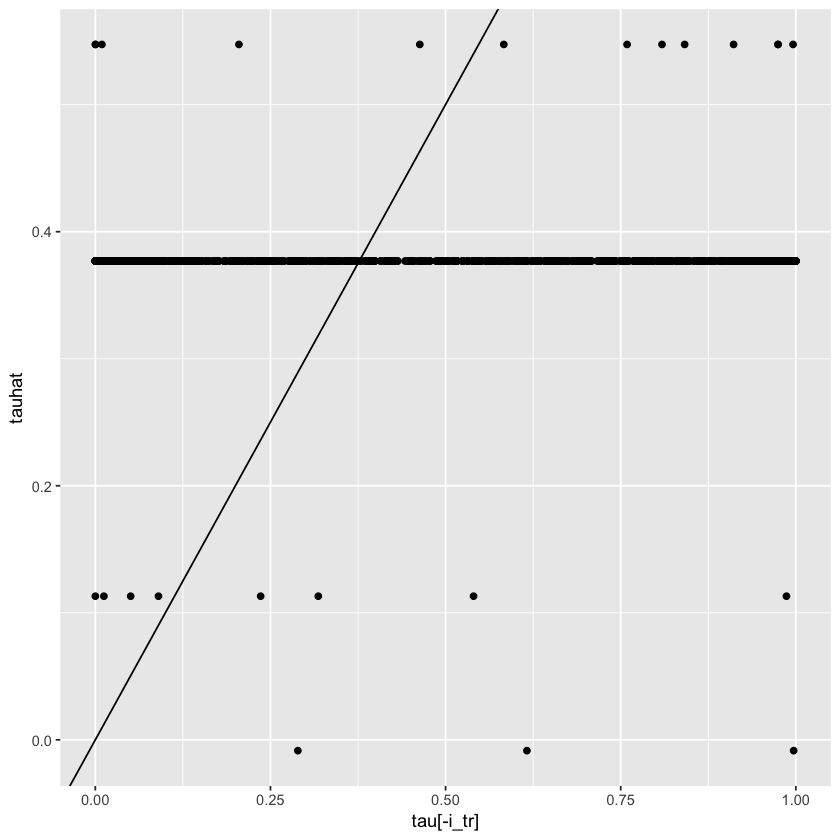

In [64]:
best_model = tmses %>% filter(tmse == min(tmse)) %>% pull(model) %>% last()
tauhat = tau_hat_S %>% filter(model==best_model) %>% pull(est_effect)
qplot(tau[-i_tr], tauhat) + geom_abline(slope=1)

In [65]:
a = y[-i_tr] - muhat_val
b = w[-i_tr] - phat_val
tmses_hat = tau_hat_S %>% 
    group_by(model) %>%
    arrange(index) %>%
    summarize(tmse = sum((a-b*est_effect)^2))

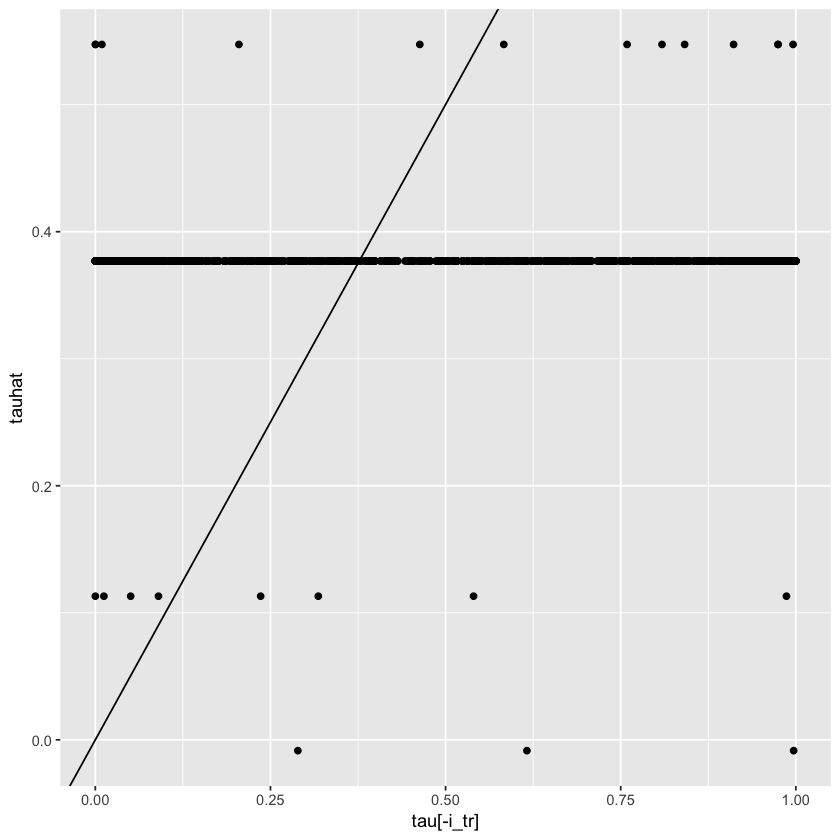

In [66]:
best_model_hat = tmses_hat %>% filter(tmse == min(tmse)) %>% pull(model) %>% last()
tauhat = tau_hat_S %>% filter(model==best_model) %>% pull(est_effect)
qplot(tau[-i_tr], tauhat) + geom_abline(slope=1)